In [ ]:
Quantas retiradas de barra é bom
melhor seção

In [1]:
import sys
sys.path.insert(0, '../')
import fconcrete as fc
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True, linewidth=3000)
import sys
import pandas as pd
from fconcrete.helpers import printProgressBar
#plt.rcParams["figure.figsize"] = (25,10)

In [2]:
def concrete_beam_function(width, height, length):
    
    n1 = fc.Node.SimpleSupport(x=0, length=20)
    n2 = fc.Node.SimpleSupport(x=length, length=20)

    slab_area = 5*5
    kn_per_m2 = 5
    distributed_load = -slab_area*kn_per_m2/500
    f1 = fc.Load.UniformDistributedLoad(distributed_load, x_begin=0, x_end=length)
    pp = fc.Load.UniformDistributedLoad(-width*height*25/100000, x_begin=0, x_end=length)

    beam = fc.ConcreteBeam(
        loads = [f1, pp],
        nodes = [n1, n2],
        section = fc.Rectangle(width,height),
        bar_steel_max_removal = 100,
        transversal_bar_inclination_angle=90,
        available_long_steel_bars = fc.AvailableLongConcreteSteelBar(diameters=[8]),
        available_transv_steel_bars = fc.AvailableTransvConcreteSteelBar(diameters=[8], space_is_multiple_of=[1]),
        available_concrete = fc.AvailableConcrete(fck=30, aggressiveness=2),
        solve_transv_steel = True,
        solve_long_steel = True,
        solve_ELS = True,
        solve_cost = True,
        verbose = False,
    )
    
    return beam

In [ ]:
report = []
width_start, height_start = 15, 15
for length in np.arange(100, 2100, 100): #2100
    new_report = fc.Analysis.getBestSolution(concrete_beam_function,
                                             max_steps_without_decrease=15,
                                             avoid_estimate=True,
                                             sort_by_multiplication=True,
                                             width=(width_start, 200, 2),
                                             height=(height_start, 300, 2),
                                             length=[length])
    report = [*report, *new_report]
    
    
    report_parcial = [ report_line[0:-4] for report_line in new_report if report_line[3] not in (-1, "cost") ]
    report_parcial = np.array(report_parcial)
    if len(report_parcial) == 0: break
    minor_cost = report_parcial[np.argsort(report_parcial[:,3])][0][:-1]
    
    width_start, height_start = max(minor_cost[0]-4, 15), max(minor_cost[1]-4, 15)

    

Progress: |██████████████████████████████████████████████████| 100.0% Complete

 Ended in step 16 out of 13299. Because max_steps_without_decrease was reached.
Progress: |██████████████████████████████████████████████████| 100.0% Complete

 Ended in step 55 out of 13299. Because max_steps_without_decrease was reached.
Progress: |██████████████████████████████████████████████████| 100.0% Complete

 Ended in step 71 out of 12927. Because max_steps_without_decrease was reached.
Progress: |██████████████████████████████████████████████████| 100.0% Complete

 Ended in step 68 out of 12276. Because max_steps_without_decrease was reached.
Progress: |██████████████████████████████████████████████████| 100.0% Complete

 Ended in step 58 out of 11439. Because max_steps_without_decrease was reached.
Progress: |██████████████████████████████████████████████████| 100.0% Complete

 Ended in step 60 out of 10602. Because max_steps_without_decrease was reached.
Progress: |█████████████████████████████

In [ ]:
df = pd.DataFrame(report)
df.columns = df.iloc[0]
df = df[df["cost"] != "cost"]

df["cost"] = df["cost"].astype('float')
df["Concrete"] = df["Concrete"].astype('float')
df["Longitudinal bar"] = df["Longitudinal bar"].astype('float')
df["Transversal bar"] = df["Transversal bar"].astype('float')

df.to_csv("Simple supported multiple tests.csv", sep=";",encoding='utf-8-sig', decimal=",")
min_cost = min(df[(df["cost"] != -1)]["cost"])



In [12]:
df["length"].unique()

array([100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0], dtype=object)

In [14]:
df["length"].unique()[0]

100.0

In [35]:
import matplotlib.patheffects as pe

In [61]:
df["width"].sort_values()

419      -3
447      -3
446      -3
445      -3
444      -3
       ... 
1559    199
1555    199
1551    199
1563    199
1568    199
Name: width, Length: 1556, dtype: object

In [57]:
df_parcial = df[df["length"] == 500]

In [58]:
df_parcial["width"]

241   -1
242   -1
243   -1
244   -1
245   -1
      ..
406    1
407    1
408    1
409    1
410    1
Name: width, Length: 170, dtype: object

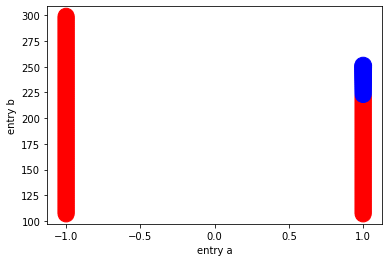

In [54]:
for length in [df["length"].unique()[4]]:
    df_parcial = df[df["length"] == length]
    min_cost = min(df_parcial[(df_parcial["cost"] != -1)]["cost"])
    data = {'a': df_parcial["width"],
        'b': df_parcial["height"],
        #'s': 100*(df_parcial["cost"]-min_cost+0.1),
        "s": df_parcial["cost"].replace(-1, min_cost),
        "c": (df_parcial["cost"] == -1).map({True: "r", False: "b"})
       }

    #for x, y, i in zip(df_parcial["width"],df_parcial["height"], range(1, len(df_parcial["height"])+1)):
    #    plt.text(x, y, i, fontsize=12, horizontalalignment='center', verticalalignment='center',
    #             color="white", path_effects=[pe.withStroke(linewidth=1, foreground='black')])
    
    plt.scatter('a', 'b', s='s', c="c", data=data)
    
    
    plt.xlabel('entry a')
    plt.ylabel('entry b')
    plt.show()

In [22]:
df

,width,height,cost,error,Concrete,Longitudinal bar,Transversal bar
1,50,50,-1.000000,"Too much steel needed in x=128.6051109009009, ...",NaN,NaN,NaN
2,50,52,-1.000000,"Too much steel needed in x=143.61912435435437,...",NaN,NaN,NaN
3,50,54,-1.000000,"Too much steel needed in x=162.6371416516517, ...",NaN,NaN,NaN
4,50,56,-1.000000,"Too much steel needed in x=193.16667000000004,...",NaN,NaN,NaN
5,50,58,1032.706666,,512.28,365.82,154.60
...,...,...,...,...,...,...,...
1221,118,110,4010.386839,,2292.92,768.96,948.51
1222,118,112,4062.552004,,2334.61,771.21,956.74
1223,118,114,4117.600572,,2376.30,776.34,964.97
1224,118,116,4173.455169,,2417.99,782.27,973.20


In [15]:
distributed_load

-0.25

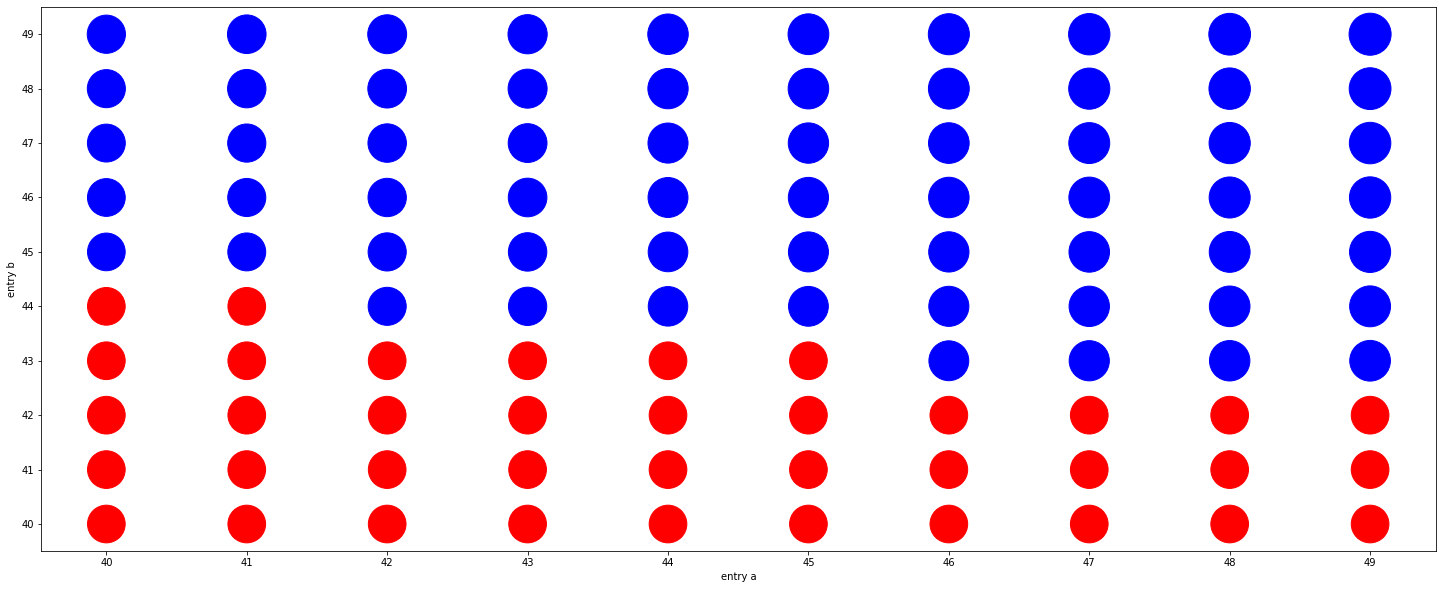

In [105]:

data = {'a': df["width"],
        's': df["cost"].replace(-1, min_cost),#30*(df["cost"]-min(df[df["cost"] != -1]["cost"]+1)),
        'b': df["height"],
        "c": (df["cost"] == -1).map({True: "r", False: "b"})
       }

plt.scatter('a', 'b', s='s', c="c", data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

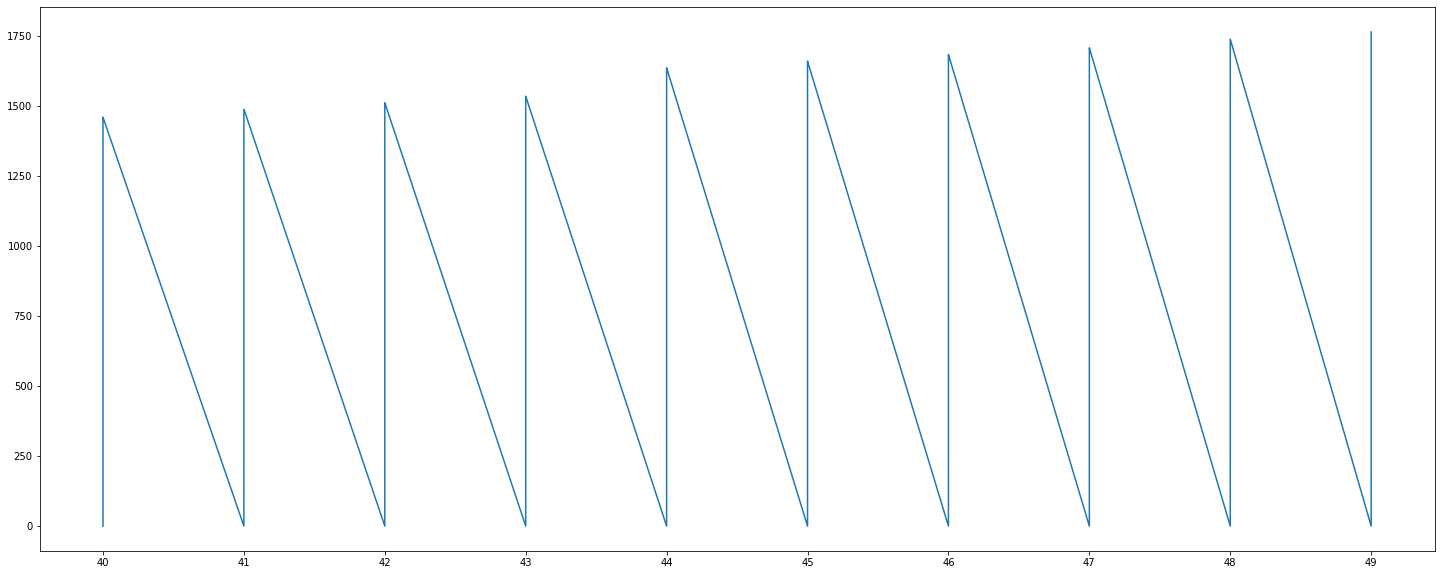

In [72]:
plt.plot(df["width"],df["cost"])


In [4]:
df = pd.DataFrame(report)
df.columns = df.iloc[0]
df = df[df["cost"] != "cost"]

df["cost"] = df["cost"].astype('float')
df["Concrete"] = df["Concrete"].astype('float')
df["Longitudinal bar"] = df["Longitudinal bar"].astype('float')
df["Transversal bar"] = df["Transversal bar"].astype('float')

#df.to_csv("Simple supported multiple tests.csv", sep=";",encoding='utf-8-sig', decimal=",")

#min_cost = min(df[(df["cost"] != -1)]["cost"])
#df
df = df[(df["cost"] != -1)].sort_values(by="cost")

#df.to_csv("Simple supported, 5m interspace, 0.25kncm.csv", sep=";",encoding='utf-8-sig', decimal=",")

NameError: name 'report' is not defined